In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
import os

LOADING DATASET

In [2]:
cars = pd.read_csv("autos.csv", encoding = "latin-1")
cars.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


IDENTIFYING MISSING VALUES

Some of the attributes have missing values i.e, NAN values. We have to identify all such columns having missing values

In [3]:
missing_values = cars.isnull().sum()
missing_values

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [4]:
cars2 = pd.read_csv("autos.csv", encoding = "latin-1")

Text(0.5,0.98,'Vehicle Type Plotting')

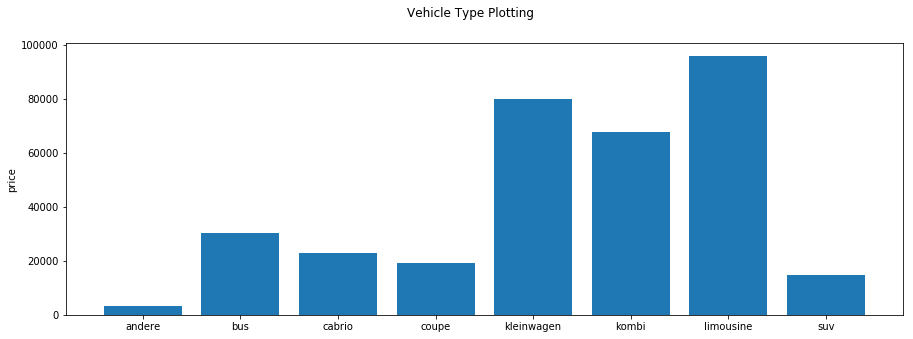

In [5]:
car_type_dict=cars2.groupby('vehicleType').count()['dateCrawled'].to_dict()
names = list(car_type_dict.keys())
values = list(car_type_dict.values())
fig, axs = plt.subplots(figsize=(15, 5))
axs.bar(names, values)
plt.ylabel('price')
fig.suptitle('Vehicle Type Plotting')

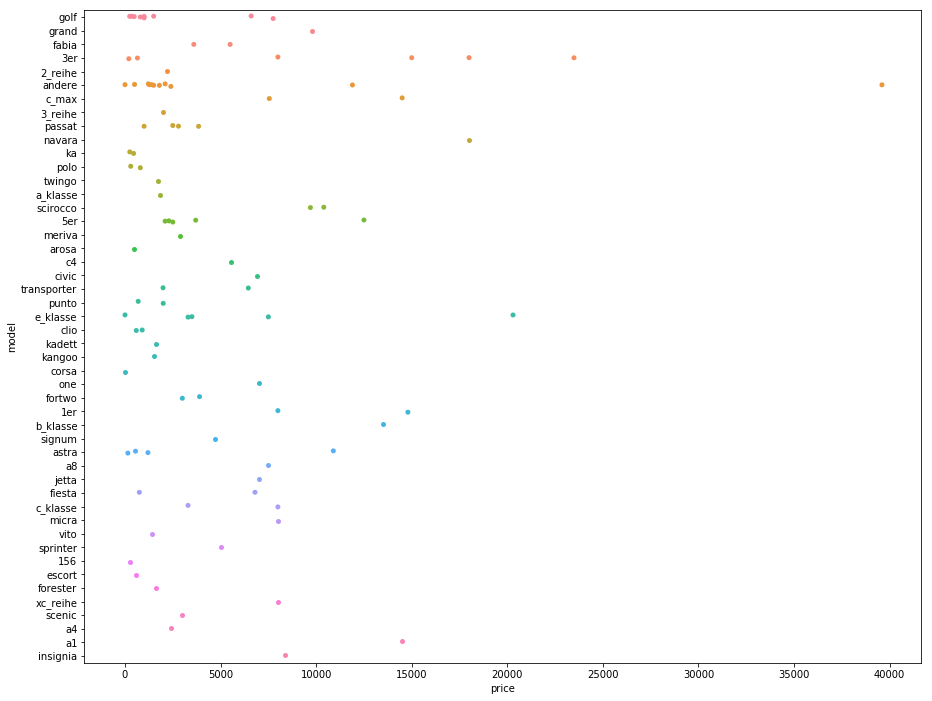

In [6]:
import seaborn as sns
f, ax = plt.subplots(figsize=(15, 12))
sns.stripplot(data = cars2.head(100), x='price', y='model', jitter=.1)
plt.show()

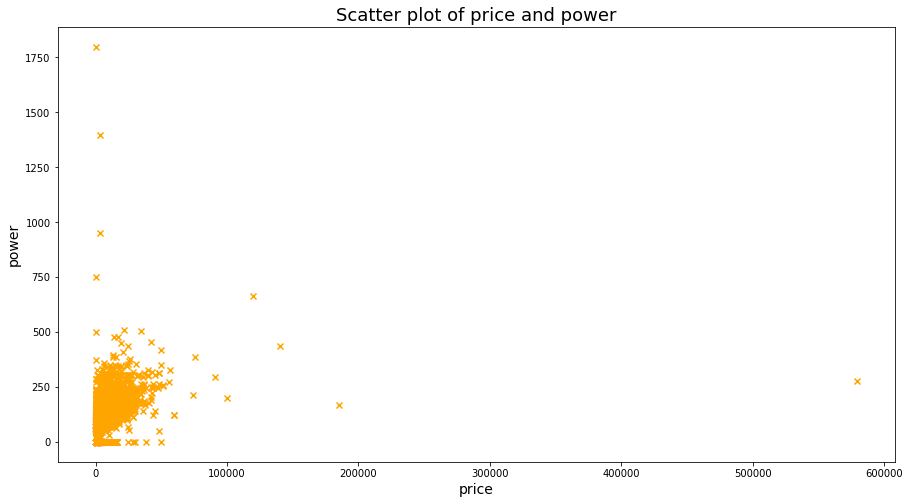

In [7]:
# here we set the figure size to 15x8
plt.figure(figsize=(15,8))
# plot two values price per year_model
plt.scatter(cars2.price.head(5000), cars2.powerPS.head(5000), c='orange', marker='x')
plt.xlabel("price", fontsize=14)
plt.ylabel("power", fontsize=14)
plt.title("Scatter plot of price and power",fontsize=18)
plt.show()

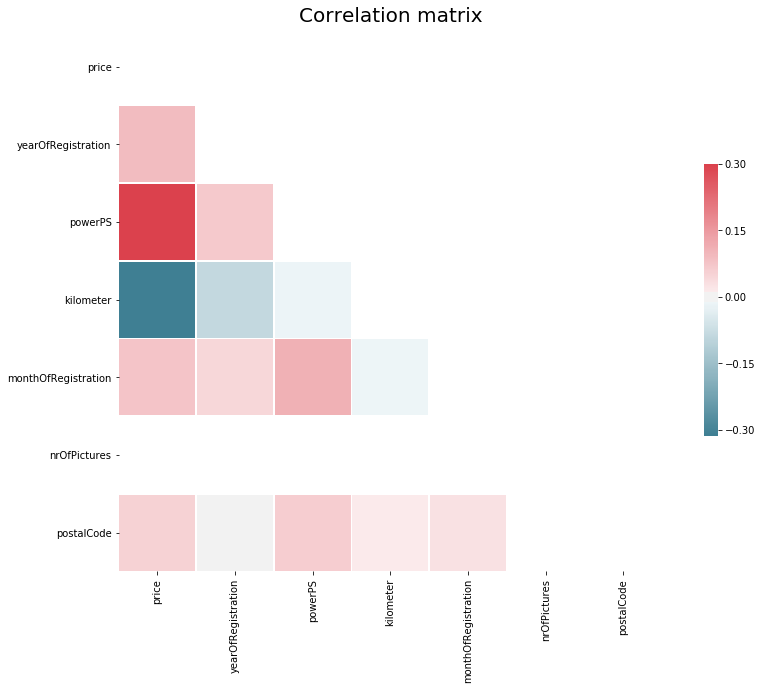

In [8]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))
# Compute the correlation matrix
corr = cars2.head(5000).corr()
#print(corr)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation matrix', 
          fontsize = 20)
plt.show()

Text(0.5,0.98,'Vehicle Brand Plotting')

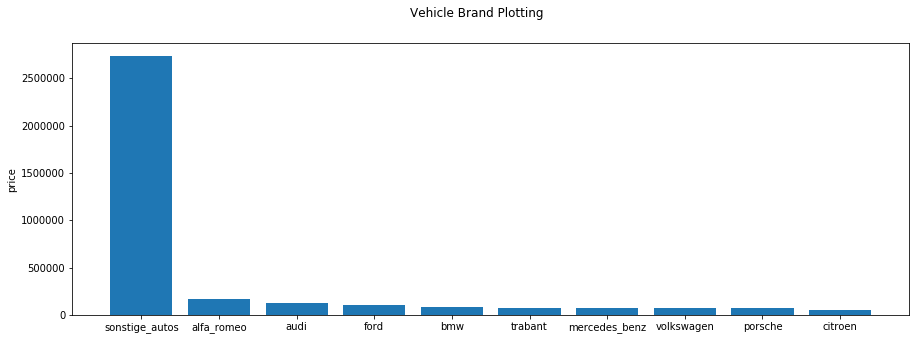

In [46]:
cars_brand_price=cars2.groupby(['brand', 'price'], as_index=False).mean().groupby('brand')['price'].mean()
cars_brand_price=cars_brand_price.sort_values(ascending=False).head(10).to_dict()
names = list(cars_brand_price.keys())
values = list(cars_brand_price.values())

fig, axs = plt.subplots(figsize=(15, 5))
axs.bar(names, values)
plt.ylabel('price')
fig.suptitle('Vehicle Brand Plotting')

DESCRIPTION OF DATASET

In [5]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


CATEGORICAL DATA DISTRIBUTION

In [7]:
cat_val = ["seller", "offerType", "abtest", "gearbox","fuelType", "notRepairedDamage", "nrOfPictures"]

for col in cat_val:
    print ([col]," : ",cars[col].unique())

['seller']  :  ['privat' 'gewerblich']
['offerType']  :  ['Angebot' 'Gesuch']
['abtest']  :  ['test' 'control']
['gearbox']  :  ['manuell' 'automatik' nan]
['fuelType']  :  ['benzin' 'diesel' nan 'lpg' 'andere' 'hybrid' 'cng' 'elektro']
['notRepairedDamage']  :  [nan 'ja' 'nein']
['nrOfPictures']  :  [0]


DATA CLEANING

In [9]:
cars_c = cars.copy()
cars_c = cars_c[
    (cars_c["yearOfRegistration"].between(1945, 2017, inclusive=True)) &
    (cars_c["powerPS"].between(100, 500, inclusive=True)) &
    (cars_c["price"].between(100, 200000, inclusive=True))
]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000218D256FF98>,
      dtype=object)

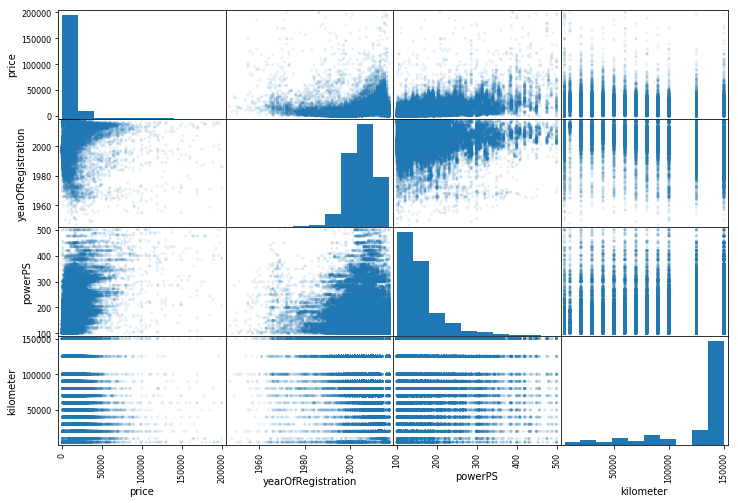

In [10]:
num_attributes = ["price", "yearOfRegistration", "powerPS", "kilometer"]
%matplotlib inline
pd.plotting.scatter_matrix(cars_c[num_attributes], figsize = (12,8), alpha = 0.1)

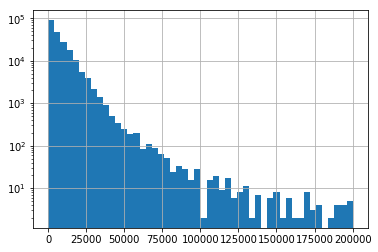

In [11]:
cars_c["price"].hist(bins = 50, log = True)

In [12]:
# Discarded amount of the Data

print("Current Data Amount : ", cars_c.shape[0]/cars.shape[0] * cars.shape[0], "\n","Current Data Amount %: ", cars_c.shape[0]/cars.shape[0])

Current Data Amount :  209316.00000000003 
 Current Data Amount %:  0.5633922611485541


In [13]:
cars_clean = cars.copy()

# Filter bad data
cars_clean = cars_clean[
    (cars_clean["yearOfRegistration"].between(1945, 2017, inclusive=True)) &
    (cars_clean["powerPS"].between(100, 500, inclusive=True)) &
    (cars_clean["price"].between(100, 200000, inclusive=True)) &
    (cars_clean["offerType"] == "Angebot") 
]

# Replace the NaN-Values
cars_clean['vehicleType'].fillna(value='blank', inplace=True)
cars_clean['gearbox'].fillna(value='blank', inplace=True)
cars_clean['model'].fillna(value='blank', inplace=True)
cars_clean['fuelType'].fillna(value='blank', inplace=True)
cars_clean['notRepairedDamage'].fillna(value='blank', inplace=True)

# Change categorical attributes dtype to category

for col in cars_clean:
    if cars_clean[col].dtype == "object":
        cars_clean[col] = cars_clean[col].astype('category')
        
# Assign codes to categorical attribues instead of strings

cat_columns = cars_clean.select_dtypes(['category']).columns

cars_clean[cat_columns] = cars_clean[cat_columns].apply(lambda x: x.cat.codes)
        
    
# Drop probably unuseful columns

drop_cols = ["dateCrawled", "abtest", "dateCreated", "nrOfPictures", "lastSeen"]

cars_clean = cars_clean.drop(drop_cols, axis=1)


In [14]:
cars_clean.head()

,name,seller,offerType,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
1,2136,1,0,18300,4,2011,2,190,50,125000,5,4,1,1,66954
2,56312,1,0,9800,8,2004,0,163,115,125000,8,4,14,0,90480
5,20652,1,0,650,7,1995,2,102,11,150000,10,1,2,1,33775
6,87933,1,0,2200,3,2004,2,109,8,150000,8,1,25,2,67112
8,44386,1,0,14500,2,2014,2,125,59,30000,8,1,10,0,94505


SPLITTING DATA INTO TRAINING AND TESTING

In [15]:
# Getting the train and test sets
train_set, test_set = train_test_split(cars_clean, test_size = 0.2, random_state = 42)

# Seperation of Predcitors (Features) and the Labes (Targets)

cars_price = train_set["price"].copy()
cars = train_set.drop("price", axis=1)

CUSTOM TRANSFORMER AND PIPELINES

In [16]:
# Since Scikit-Learn doesn't hanldes DataFrame, we build a class for it

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DFSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [17]:
# Setting categorical and numerical attributes

cat_attribs = ["name", "seller", "offerType", "vehicleType", "fuelType", "brand", "notRepairedDamage"]
num_attribs = list(cars.drop(cat_attribs, axis=1))

# Building the Pipelines

num_pipeline = Pipeline([
    ("selector", DFSelector(num_attribs)),
    ("std_scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("selector", DFSelector(cat_attribs)),
    ("encoder", OneHotEncoder(sparse=True))
])

full_pipeline = FeatureUnion(transformer_list =[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline)
])



In [19]:
cars_prepared = full_pipeline.fit_transform(cars)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


TRAINING AND COMPARING MODELS

A. Linear Regression model

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(cars_prepared, cars_price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
cars_predictions = lin_reg.predict(cars_prepared)

from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(cars_price, cars_predictions))

Variance score: 0.96


B. Decision Tree Model

In [24]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(cars_prepared, cars_price)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [33]:
cars_predictions = tree_reg.predict(cars_prepared)

from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(cars_price, cars_predictions))

Variance score: 1.00


Random Forest Model

In [26]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42, n_jobs =-1, max_depth = 30 )
forest_reg.fit(cars_prepared, cars_price)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [31]:
cars_predictions = forest_reg.predict(cars_prepared)

from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(cars_price, cars_predictions))

Variance score: 0.97


FEATURE IMPORTANCE

In [28]:
feature_importances = forest_reg.feature_importances_
feature_importances

array([0.3657829 , 0.0075264 , 0.26012552, ..., 0.00062725, 0.00292923,
       0.00288699])

In [29]:
cat_encoder = cat_pipeline.named_steps["encoder"]
#cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs #+ cat_encoder
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36578290441759687, 'yearOfRegistration'),
 (0.2601255222326474, 'powerPS'),
 (0.08622594363478499, 'kilometer'),
 (0.04446294124379731, 'model'),
 (0.015221683652800844, 'postalCode'),
 (0.008287531565591926, 'monthOfRegistration'),
 (0.007526398700918757, 'gearbox')]

FINAL PREDICTION

In [32]:
cars_test = test_set.drop("price", axis = 1)
cars_price_test = test_set["price"].copy()
cars_test_prepared = full_pipeline.transform(cars_test) ## call transform NOT fit_transform

final_predictions_linear_regression = lin_reg.predict(cars_test_prepared)
final_predictions_decision_tree = tree_reg.predict(cars_test_prepared)
final_predictions_random_forest = forest_reg.predict(cars_test_prepared)

from sklearn.metrics import r2_score
print('Variance score for Linear Regression: %.2f' % r2_score(cars_price_test, final_predictions_linear_regression))

print('Variance score for Decision Tree: %.2f' % r2_score(cars_price_test, final_predictions_decision_tree))

print('Variance score Random Forest: %.2f' % r2_score(cars_price_test, final_predictions_random_forest))


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Variance score for Linear Regression: 0.59
Variance score for Decision Tree: 0.78
Variance score Random Forest: 0.84


In [ ]:
Clearly it can be seen that Random Forest Method outperforms.